In [4]:
import pandas as pd

# Load the KDD Cup '99 dataset
data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")


In [ ]:
# Select relevant features and target variable
X = data.drop(columns=['label'])  # Independent variables
y = data['label']  # Dependent variable

# Encode categorical variables, if needed
X = pd.get_dummies(X)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


C:\Users\Varsha A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


C:\Users\Varsha A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Varsha A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9469049836039026
Classification Report:
                  precision    recall  f1-score   support

           back       0.92      0.21      0.34       431
buffer_overflow       0.00      0.00      0.00        11
      ftp_write       0.00      0.00      0.00         1
   guess_passwd       0.00      0.00      0.00         8
           imap       0.00      0.00      0.00         3
        ipsweep       0.00      0.00      0.00       263
           land       0.00      0.00      0.00         3
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00         1
        neptune       0.84      1.00      0.91     21408
           nmap       0.00      0.00      0.00        45
         normal       0.96      0.81      0.88     19366
           perl       0.00      0.00      0.00         1
            pod       0.00      0.00      0.00        41
      portsweep       0.00      0.00      0.00       221
        rootkit       0.00      0.

C:\Users\Varsha A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import seaborn as sns
import datetime as dt

def confusion_matrix_func(y_test, y_test_pred):
    
    '''
    This function computes the confusion matrix using Predicted and Actual values and plots a confusion matrix heatmap
    '''
    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['back', 'butter_overflow', 'loadmodule', 'guess_passwd', 'imap', 'ipsweep', 'warezmaster', 'rootkit', 
'multihop', 'neptune', 'nmap', 'normal', 'phf', 'perl', 'pod', 'portsweep', 'ftp_write', 'satan', 'smurf', 'teardrop', 'warezclient', 'land']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

# calculate roc curve
from sklearn.metrics import *
#fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred)
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred = lb.transform(pred)
    return roc_auc_score(y_test, pred, average=average)

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Here:
# - x is your feature data (input variables)
# - y is your target data (output or labels)
# - test_size specifies the proportion of the data to be used for testing (e.g., 0.2 for 20% test data)
# - random_state is a seed for reproducibility (use any integer value or leave it as None)

# Now you have x_train, x_test, y_train, and y_test for training and testing your machine learning model.


NameError: name 'x' is not defined

In [11]:
# Assuming you've already loaded and split your data into x_train, y_train, x_test, y_test

print('Train data')
print(x_train.shape)
print(y_train.shape)
print('=' * 20)
print('Test data')
print(x_test.shape)
print(y_test.shape)
print('=' * 20)

# Measure accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you've already defined and trained your model
# model = your_model_here

print('Predicting on the test data:')
start = dt.datetime.now()
# escore = model.evaluate(x_test, y_test, batch_size=32) # Uncomment if using Keras or a similar library
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
y_eval = np.argmax(y_test, axis=1)

vscore = accuracy_score(y_eval, pred)

rscore = recall_score(y_eval, pred, average='weighted')

ascore = precision_score(y_eval, pred, average='weighted')

f1score = f1_score(y_eval, pred, average='weighted')

# Define the multiclass_roc_auc_score function
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    # Custom implementation or use a library function
    pass

roc_auc_score = multiclass_roc_auc_score(y_test, pred)

print('Completed')
print('Time taken:', dt.datetime.now() - start)
print('=' * 50)
print("Validation score: {}".format(vscore))
print('=' * 50)
# print("Evaluation score: {}".format(escore)) # Uncomment if using Keras or a similar library
print('=' * 50)
print("Recall score: {}".format(rscore))
print('=' * 50)
print("Precision score: {}".format(ascore))
print('=' * 50)
print("F1 score: {}".format(f1score))
print('=' * 50)
print("ROC-AUC score: {}".format(roc_auc_score))


Train data


NameError: name 'x_train' is not defined

In [13]:
confusion_matrix_func(y_eval, pred)


NameError: name 'y_eval' is not defined

In [14]:
# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [15]:
# Summary statistics for numerical features
print(data.describe())


            duration     src_bytes     dst_bytes           land  \
count  494020.000000  4.940200e+05  4.940200e+05  494020.000000   
mean       47.979400  3.025616e+03  8.685308e+02       0.000045   
std       707.747185  9.882191e+05  3.304003e+04       0.006673   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  4.500000e+01  0.000000e+00       0.000000   
50%         0.000000  5.200000e+02  0.000000e+00       0.000000   
75%         0.000000  1.032000e+03  0.000000e+00       0.000000   
max     58329.000000  6.933756e+08  5.155468e+06       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   494020.000000  494020.000000  494020.000000      494020.000000   
mean         0.006433       0.000014       0.034519           0.000152   
std          0.134805       0.005510       0.782103           0.015520   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000     

In [1]:
import pandas as pd

# Load your CSV data (replace 'your_data.csv' with the actual file path)
data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")

# Assuming you want to calculate summary statistics for specific columns
selected_columns = ['duration', 'urgent', 'hot', 'src_bytes']  # Replace with the actual column names

# Select the columns of interest
selected_data = data[selected_columns]

# Calculate summary statistics for the selected columns
summary_stats = selected_data.describe()

# Display the summary statistics
print(summary_stats)


            duration         urgent            hot     src_bytes
count  494020.000000  494020.000000  494020.000000  4.940200e+05
mean       47.979400       0.000014       0.034519  3.025616e+03
std       707.747185       0.005510       0.782103  9.882191e+05
min         0.000000       0.000000       0.000000  0.000000e+00
25%         0.000000       0.000000       0.000000  4.500000e+01
50%         0.000000       0.000000       0.000000  5.200000e+02
75%         0.000000       0.000000       0.000000  1.032000e+03
max     58329.000000       3.000000      30.000000  6.933756e+08


In [2]:
# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Display the correlation matrix
print(correlation_matrix)

           duration    urgent       hot  src_bytes
duration   1.000000  0.003786  0.013213   0.004258
urgent     0.003786  1.000000  0.000356  -0.000005
hot        0.013213  0.000356  1.000000   0.004483
src_bytes  0.004258 -0.000005  0.004483   1.000000


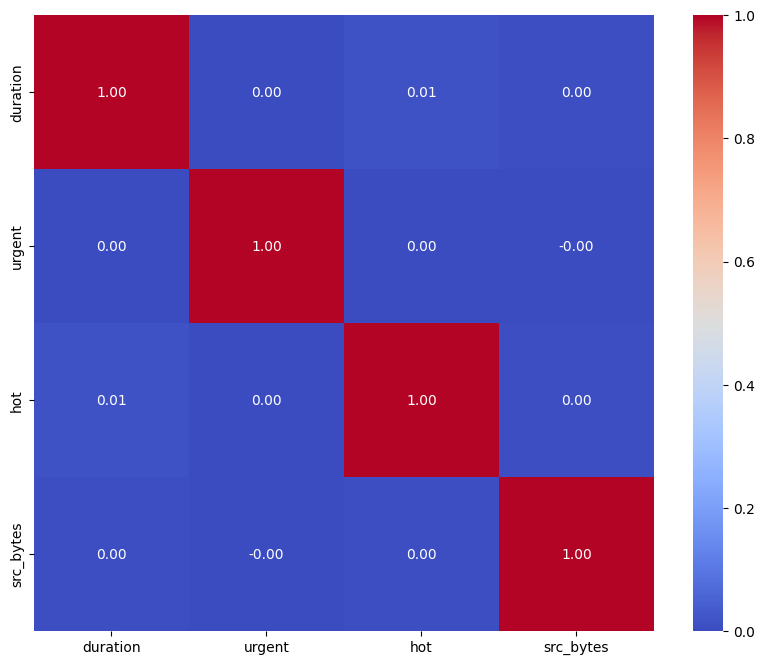

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the heatmap
plt.show()

In [6]:
import pandas as pd

# Create a dictionary to store the summary statistics
summary_data = {
    'Statistic': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'duration': [494020.000, 47.979400, 707.747185, 0.000, 0.000, 0.000, 0.000, 58329.000],
    'urgent': [494020.000, 0.000014, 0.005510, 0.000, 0.000, 0.000, 0.000, 3.000],
    'hot': [494020.000, 0.034519, 0.782103, 0.000, 0.000, 0.000, 0.000, 30.000],
    'src_bytes': [494020000.000, 3025.616, 988219.100, 0.000, 45.000, 520.000, 1032.000, 693375600.000]
}

# Create a DataFrame from the dictionary
summary_df = pd.DataFrame(summary_data)

# Display the DataFrame
print(summary_df)


  Statistic       duration         urgent            hot     src_bytes
0     count  494020.000000  494020.000000  494020.000000  4.940200e+08
1      mean      47.979400       0.000014       0.034519  3.025616e+03
2       std     707.747185       0.005510       0.782103  9.882191e+05
3       min       0.000000       0.000000       0.000000  0.000000e+00
4       25%       0.000000       0.000000       0.000000  4.500000e+01
5       50%       0.000000       0.000000       0.000000  5.200000e+02
6       75%       0.000000       0.000000       0.000000  1.032000e+03
7       max   58329.000000       3.000000      30.000000  6.933756e+08


In [9]:
import pandas as pd
import numpy as np
from scipy import stats

# Load your DataFrame or data
df = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")

# Replace "column_name" with the name of the column you want to analyze for outliers
column_to_analyze = df["src_bytes"]

# Define a Z-score threshold for outlier detection (e.g., 2 for a 95% confidence interval)
z_threshold = 2

# Calculate Z-scores for the selected column
z_scores = np.abs(stats.zscore(column_to_analyze))

# Create a Boolean mask to identify outliers
outliers_mask = z_scores > z_threshold

# Extract the rows with outliers
outliers = df[outliers_mask]

# Print or analyze the outliers
print("Outliers:")
print(outliers)


Outliers:
        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
31617          2           tcp  ftp_data   SF    2194619          0     0   
32202          2           tcp  ftp_data   SF    2194619          0     0   
39414          2           tcp  ftp_data   SF    2194619          0     0   
39566          2           tcp  ftp_data   SF    2194619          0     0   
41863          2           tcp  ftp_data   SF    2194619          0     0   
...          ...           ...       ...  ...        ...        ...   ...   
371858         2           tcp  ftp_data   SF    2194619          0     0   
455933         3           tcp  ftp_data   SF    2194619          0     0   
480668         2           tcp  ftp_data   SF    2194619          0     0   
486883         2           tcp  ftp_data   SF    2104380          0     0   
486918         2           tcp  ftp_data   SF    2194619          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
3

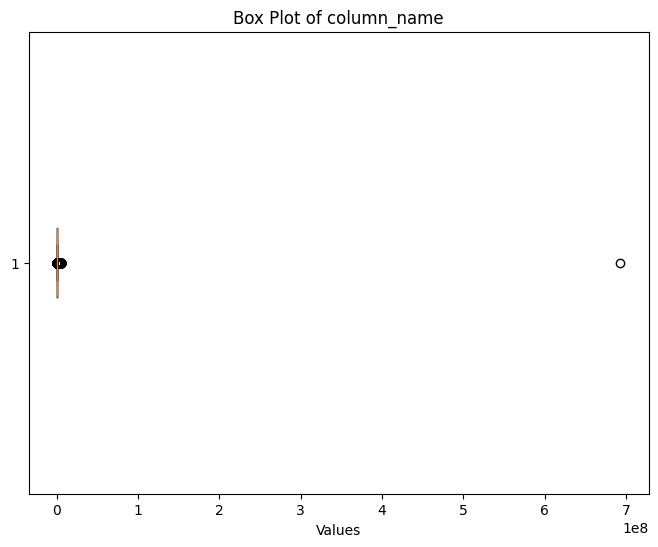

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame or data
df = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")
# Replace "column_name" with the name of the column you want to create a box plot for
column_to_plot = df["src_bytes"]

# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.boxplot(column_to_plot, vert=False)  # vert=False for horizontal box plot

# Customize the plot
plt.title("Box Plot of " + "column_name")
plt.xlabel("Values")
plt.show()


Statistics for duration:
Mean: 47.97939961944861
Standard Deviation: 707.7471853280666
Median: 0.0
Min: 0
Max: 58329
Outliers:
4026      12454
7607      10774
26559      6087
26607     13368
27233      3029
          ...  
491593     2406
491601     2553
491604     2695
491605     2734
491606     2751
Name: duration, Length: 4179, dtype: int64


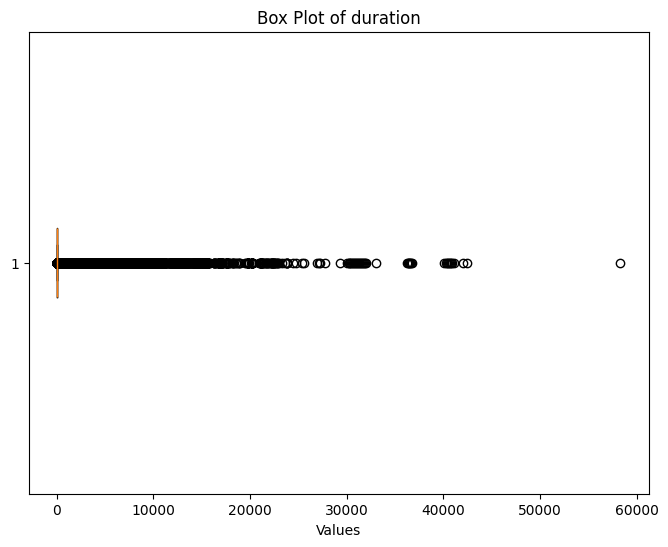

Statistics for urgent:
Mean: 1.4169466823205539e-05
Standard Deviation: 0.005510263503669807
Median: 0.0
Min: 0
Max: 3
Outliers:
39565     2
43066     1
74222     3
141513    1
Name: urgent, dtype: int64


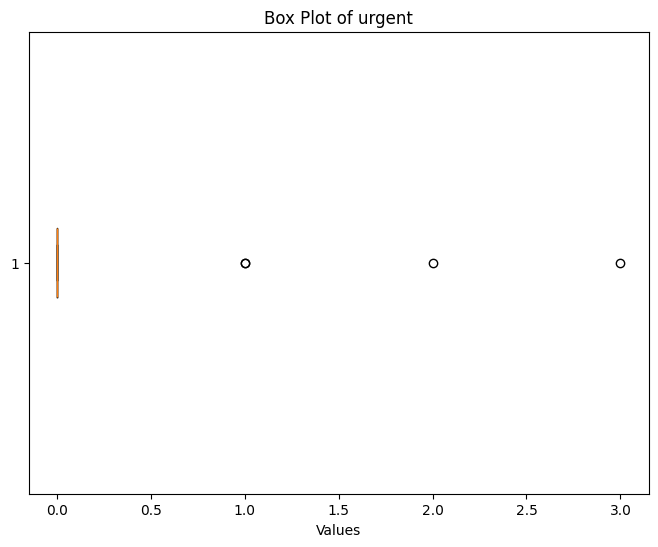

Statistics for hot:
Mean: 0.03451884539087487
Standard Deviation: 0.7821033719503345
Median: 0.0
Min: 0
Max: 30
Outliers:
744        3
745        3
767       19
769        6
770        4
          ..
491797     4
491800    14
491803    12
491808     6
493639     2
Name: hot, Length: 2936, dtype: int64


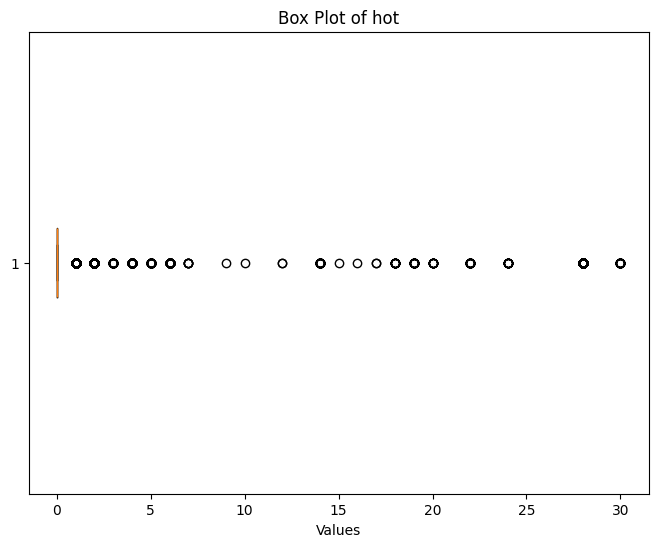

Statistics for src_bytes:
Mean: 3025.61574430185
Standard Deviation: 988219.1012247463
Median: 520.0
Min: 0
Max: 693375640
Outliers:
31617     2194619
32202     2194619
39414     2194619
39566     2194619
41863     2194619
           ...   
371858    2194619
455933    2194619
480668    2194619
486883    2104380
486918    2194619
Name: src_bytes, Length: 84, dtype: int64


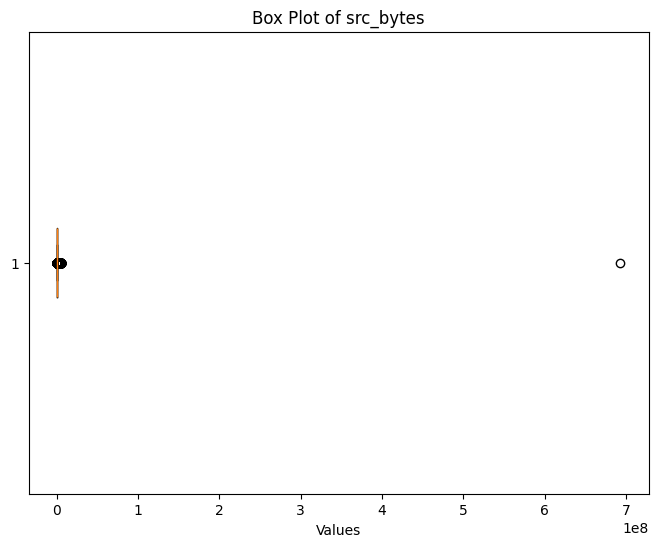

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load your DataFrame or data
df = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")

# Replace these with the names of the columns you want to analyze
columns_to_analyze = ['duration', 'urgent', 'hot', 'src_bytes']

# Iterate through the specified columns
for column_name in columns_to_analyze:
    # Calculate statistics
    column = df[column_name]
    mean = column.mean()
    std = column.std()
    median = column.median()
    min_value = column.min()
    max_value = column.max()
    
    # Print statistics
    print(f"Statistics for {column_name}:")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std}")
    print(f"Median: {median}")
    print(f"Min: {min_value}")
    print(f"Max: {max_value}")

    # Detect outliers using Z-score
    z_threshold = 2
    z_scores = np.abs(stats.zscore(column))
    outliers_mask = z_scores > z_threshold
    outliers = column[outliers_mask]
    
    # Print and visualize outliers with a box plot
    print("Outliers:")
    print(outliers)
    
    # Create a box plot for the column
    plt.figure(figsize=(8, 6))
    plt.boxplot(column, vert=False)
    plt.title(f"Box Plot of {column_name}")
    plt.xlabel("Values")
    plt.subplots_adjust(wspace=1.0)
    plt.show()


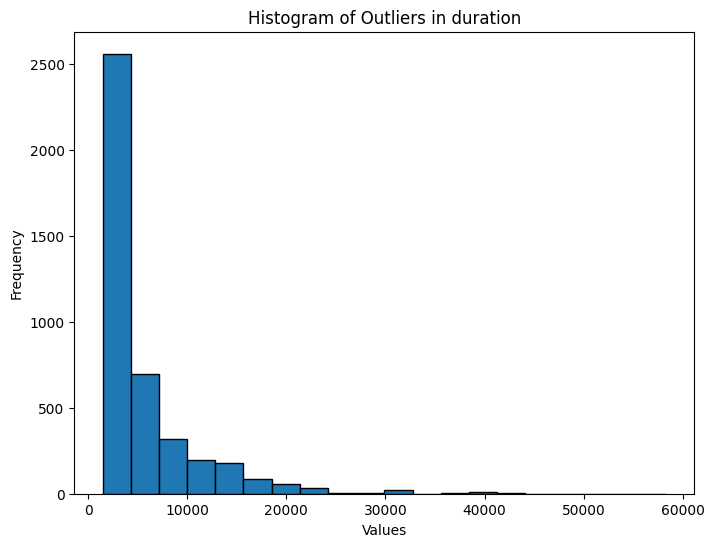

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load your DataFrame or data
df = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")

# Replace "column_name" with the name of the column you want to analyze for outliers
column_name = "duration"

# Calculate Z-scores for the selected column
z_scores = np.abs(stats.zscore(df[column_name]))

# Set a Z-score threshold for outlier detection (e.g., 2 for a 95% confidence interval)
z_threshold = 2

# Identify outliers using the Z-score method
outliers = df[z_scores > z_threshold]

# Create a histogram of the outliers
plt.figure(figsize=(8, 6))
plt.hist(outliers[column_name], bins=20, edgecolor='k')  # Adjust the number of bins and formatting as needed
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title(f"Histogram of Outliers in {column_name}")
plt.show()


In [20]:
import pandas as pd
from scipy.stats import ttest_ind

# Identify the dependent variable
dependent_variable = 'label'

# Create a list of all the independent variables in the dataset
independent_variables = df.columns.to_list()
independent_variables.remove(dependent_variable)

# Limit the number of variables to analyze
num_variables_to_analyze = 5  # Change this to the desired number of variables to analyze

# Ensure that the data types of the columns are numeric
for col in independent_variables:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' option will convert non-numeric values to NaN

# Remove rows with NaN values, if any
df.dropna(inplace=True)

# Iterate through a subset of independent variables
for independent_variable in independent_variables[:num_variables_to_analyze]:
    t_test = ttest_ind(df[dependent_variable][df[independent_variable] == 1], df[dependent_variable][df[independent_variable] == 0])

    # Print the results of the t-test for each independent variable
    print('T-test results for {}:'.format(independent_variable))
    print('t-statistic:', t_test.statistic)
    print('p-value:', t_test.pvalue)
    print('\n')


T-test results for duration:
t-statistic: nan
p-value: nan


T-test results for protocol_type:
t-statistic: nan
p-value: nan


T-test results for service:
t-statistic: nan
p-value: nan


T-test results for flag:
t-statistic: nan
p-value: nan


T-test results for src_bytes:
t-statistic: nan
p-value: nan




In [21]:
# Specify the column names for which you want to create box plots
columns_to_plot = ['duration', 'urgent', 'hot']


In [23]:
dependent_variable = 'label'
independent_variables = df.columns.to_list()
independent_variables.remove(dependent_variable)

# Create a crosstab for each independent variable with the dependent variable
for independent_variable in independent_variables:
    crosstab = pd.crosstab(df[dependent_variable], df[independent_variable])

    # Print the crosstab for each independent variable
    print('Crosstab for {}:'.format(independent_variable))
    print(crosstab)

Crosstab for duration:
Empty DataFrame
Columns: []
Index: []
Crosstab for protocol_type:
Empty DataFrame
Columns: []
Index: []
Crosstab for service:
Empty DataFrame
Columns: []
Index: []
Crosstab for flag:
Empty DataFrame
Columns: []
Index: []
Crosstab for src_bytes:
Empty DataFrame
Columns: []
Index: []
Crosstab for dst_bytes:
Empty DataFrame
Columns: []
Index: []
Crosstab for land:
Empty DataFrame
Columns: []
Index: []
Crosstab for wrong_fragment:
Empty DataFrame
Columns: []
Index: []
Crosstab for urgent:
Empty DataFrame
Columns: []
Index: []
Crosstab for hot:
Empty DataFrame
Columns: []
Index: []
Crosstab for num_failed_logins:
Empty DataFrame
Columns: []
Index: []
Crosstab for logged_in:
Empty DataFrame
Columns: []
Index: []
Crosstab for lnum_compromised:
Empty DataFrame
Columns: []
Index: []
Crosstab for lroot_shell:
Empty DataFrame
Columns: []
Index: []
Crosstab for lsu_attempted:
Empty DataFrame
Columns: []
Index: []
Crosstab for lnum_root:
Empty DataFrame
Columns: []
Index: []


In [29]:
df.dropna(subset=[dependent_variable, independent_variable], inplace=True)


In [30]:
df[dependent_variable] = df[dependent_variable].astype('category')
df[independent_variable] = df[independent_variable].astype('category')


In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

# Identify the dependent and independent variables
dependent_variable = 'label'
independent_variables = df.columns.to_list()
independent_variables.remove(dependent_variable)

# Create a contingency table for each independent variable with the dependent variable
for independent_variable in independent_variables:
    contingency_table = pd.crosstab(df[dependent_variable], df[independent_variable])

    # Perform a chi-square test on each contingency table
    chi_square_test = chi2_contingency(contingency_table)

    # Print the results of the chi-square test for each independent variable
    print('Chi-square test results for {}:'.format(independent_variable))
    print('chi-square statistic:', chi_square_test[0])
    print('p-value:', chi_square_test[1])
    print('\n')

ValueError: No data; `observed` has size 0.

<Axes: xlabel='duration', ylabel='label'>

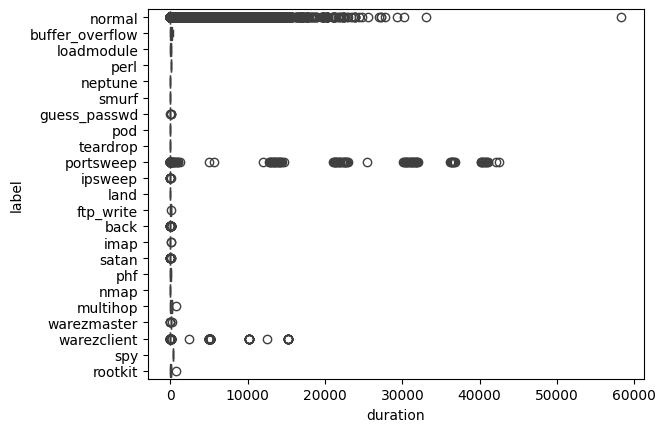

In [33]:
sns.boxplot(y=data['label'],x=data['duration'])

In [34]:
import pandas as pd
data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")

In [35]:
data.corr()

ValueError: could not convert string to float: 'tcp'

In [36]:
import pandas as pd




# Specify the categorical column(s) to one-hot encode
categorical_columns = ['protocol_type']

# Perform one-hot encoding using pandas
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [37]:
print(df)

Empty DataFrame
Columns: [duration, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, lnum_compromised, lroot_shell, lsu_attempted, lnum_root, lnum_file_creations, lnum_shells, lnum_access_files, lnum_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, label]
Index: []

[0 rows x 41 columns]


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the CSV file containing your data
data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")

# Identify the columns for your features and the target variable
# Replace 'feature_columns' and 'target_column' with your actual column names
feature_columns = ['duration', 'land', 'urgent']
target_column = 'hot'

# Split the data into features (X) and the target variable (y)
X = data[feature_columns]
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model without the alternative data
model_without_alternative = RandomForestClassifier(random_state=42)
model_without_alternative.fit(X_train.drop('urgent', axis=1), y_train)

# Make predictions and evaluate the model without the alternative data
y_pred_without_alternative = model_without_alternative.predict(X_test.drop('urgent', axis=1))
accuracy_without_alternative = accuracy_score(y_test, y_pred_without_alternative)

# Train a model with the alternative data
model_with_alternative = RandomForestClassifier(random_state=42)
model_with_alternative.fit(X_train, y_train)

# Make predictions and evaluate the model with the alternative data
y_pred_with_alternative = model_with_alternative.predict(X_test)
accuracy_with_alternative = accuracy_score(y_test, y_pred_with_alternative)

# Compare model performance with and without the alternative data
print("Model Accuracy without Alternative Data:", accuracy_without_alternative)
print("Model Accuracy with Alternative Data:", accuracy_with_alternative)

# Calculate the gain in model performance
gain_in_accuracy = accuracy_with_alternative - accuracy_without_alternative
print("Gain in Model Accuracy with Alternative Data:", gain_in_accuracy)

# You can perform further statistical tests or additional evaluation metrics as needed


Model Accuracy without Alternative Data: 0.993512408404518
Model Accuracy with Alternative Data: 0.993512408404518
Gain in Model Accuracy with Alternative Data: 0.0


In [42]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Replace 'y_true' with the true target values and 'y_pred' with the predicted values from your model
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
plot_confusion_matrix(model, X_test, y_test, ax=ax)  # Replace 'model', 'X_test', and 'y_test' with your model and test data
plt.show()


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Varsha A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\__init__.py)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load your dataset (replace 'your_data.csv' with the actual dataset file)
data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")

# Preprocess the data, including feature selection, engineering, and target variable encoding.

# Split the data into features and the target variable
X = data.drop('hot', axis=1)  # Features
y = data['hot']  # Target variable (0 for normal, 1 for intrusive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


ValueError: could not convert string to float: 'tcp'

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load your dataset (replace 'your_data.csv' with the actual dataset file)
data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")

# Preprocess the data, including feature selection, engineering, and target variable encoding.

# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns

# Split the data into features and the target variable
X = data.drop('urgent', axis=1)  # Features
y = data['urgent']  # Target variable (0 for normal, 1 for intrusive)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create and train a logistic regression model in a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")


ValueError: A given column is not a column of the dataframe

In [50]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Load your dataset (replace 'your_data.csv' with the actual dataset file)
data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")

# Select one of the features as the target variable
target_feature = 'land'  # Replace 'land' with the name of your chosen feature

# Create a new binary target variable based on a condition (e.g., > median value)
median_value = np.median(data[target_feature])
data['binary_target'] = data[target_feature] > median_value

# Features for logistic regression
X = data.drop(['binary_target', target_feature], axis=1)

# Target variable for logistic regression
y = data['binary_target']

# Separate categorical and numerical features
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create and train a logistic regression model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

model.fit(X, y)

# Get the feature names after one-hot encoding
feature_names = (list(numerical_cols) +
                 list(model.named_steps['preprocessor']
                      .named_transformers_['cat'].get_feature_names(categorical_cols)))

# Print the coefficients to understand feature importance
coefficients = model.named_steps['classifier'].coef_[0]
for feature, coef in zip(feature_names, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef:.4f}")


C:\Users\Varsha A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [51]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: could not convert string to float: 'tcp'

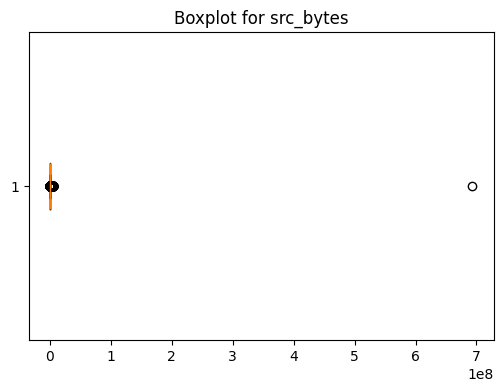

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")

# Choose the column(s) for outlier detection and boxplots
columns_to_check = ['src_bytes']  # Replace with the actual column name(s)

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Detect outliers for the specified columns and create boxplots
outliers = {}
for col in columns_to_check:
    col_outliers = detect_outliers_iqr(data, col)
    outliers[col] = col_outliers

# Create boxplots for the specified columns
for col, col_data in outliers.items():
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[col], vert=False)
    plt.title(f'Boxplot for {col}')
    plt.show()

# You can also save the outliers to a new CSV file if needed
for col, col_data in outliers.items():
    col_data.to_csv(f'{col}_outliers.csv', index=False)


In [1]:
import pandas as pd
import statsmodels.api as sm


In [2]:
# Load your dataset into a DataFrame
data = pd.read_csv("C:\\Users\\Varsha A\\Downloads\\kddcup99_csv.csv")

# Define your dependent variable (target) and independent variables (features)
y = data['logged_in']
X = data[['hot', 'urgent', 'land']]


In [3]:
# Add a constant term to the independent variables (intercept term)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()


         Current function value: 0.407763
         Iterations: 35


C:\Users\Varsha A\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [4]:
summary_table = result.summary()


In [5]:
# Save the summary table to a CSV file
summary_table_as_csv = result.summary().as_csv()
with open('logistic_regression_summary.csv', 'w') as file:
    file.write(summary_table_as_csv)


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
# Step 2: Data Preprocessing
# Define your feature columns and target variable
feature_columns = ['hot', 'urgent', 'land']  # Replace with your feature column names
target_column = 'logged_in'  # Replace with your target variable name

# Split the data into features (X) and the target variable (y)
X = data[feature_columns]
y = data[target_column]

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 7: Print model performance metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.8594287680660702
Confusion Matrix:
 [[84295     9]
 [13880   620]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92     84304
           1       0.99      0.04      0.08     14500

    accuracy                           0.86     98804
   macro avg       0.92      0.52      0.50     98804
weighted avg       0.88      0.86      0.80     98804



In [8]:
# Select relevant features and target variable
X = data.drop(columns=['label'])  # Independent variables
y = data['label']  # Dependent variable

# Encode categorical variables, if needed
X = pd.get_dummies(X)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
model = LogisticRegression(max_iter=100)  # Increase max_iter to a larger value


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=100)  # Increase max_iter and fit the model with scaled data
model.fit(X_train_scaled, y_train)


C:\Users\Varsha A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


C:\Users\Varsha A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()